# Kinematics Analysis

In [1]:
from cyto.postprocessing.graph import *
from cyto.utils.label_to_table import *
import dask_image.imread
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import numpy as np
import pyclesperanto_prototype as cle
import pandas as pd

### Load ultrack mapped, area-sized filtered and track_length pre-filtered tracks or signal mapped dataframes from example 5 

In [2]:
tracks_df_filtered_tcell = pd.read_csv("/mnt/Data/UTSE/2023_10_17_Nyeso1HCT116_1G4CD8_icam_FR10s_0p1mlperh/tracks/tcell_tracks/tracks/tcell_tracks_filtered.csv")
tracks_df_filtered_cancer = pd.read_csv("/mnt/Data/UTSE/2023_10_17_Nyeso1HCT116_1G4CD8_icam_FR10s_0p1mlperh/tracks/cancer_tracks/tracks/cancer_tracks_filtered.csv")
tracks_df_filtered_tcell.drop("Unnamed: 0", axis=1, inplace=True)
tracks_df_filtered_cancer.drop("Unnamed: 0", axis=1, inplace=True)

# Perform Kinematics Calculations

## T Cells

In [3]:
# # displacement
diff = tracks_df_filtered_tcell.groupby("track_id")[["x","y","frame"]].diff()
tracks_df_filtered_tcell["dx from previous point"] = diff["x"].fillna(0)
tracks_df_filtered_tcell["dy from previous point"] = diff["y"].fillna(0)
tracks_df_filtered_tcell["displacement from previous point"] = np.linalg.norm(tracks_df_filtered_tcell[["dx from previous point","dy from previous point"]], axis=1)

tracks_df_filtered_tcell["dx from origin"] = tracks_df_filtered_tcell.groupby(['track_id'])['dx from previous point'].cumsum().fillna(0)
tracks_df_filtered_tcell["dy from origin"] = tracks_df_filtered_tcell.groupby(['track_id'])['dy from previous point'].cumsum().fillna(0)
tracks_df_filtered_tcell["displacement from origin"] = np.linalg.norm(tracks_df_filtered_tcell[["dx from origin","dy from origin"]], axis=1)
tracks_df_filtered_tcell["dx acc"] = diff["x"].apply(lambda x: abs(x)).fillna(0) # abs displacement
tracks_df_filtered_tcell["dy acc"] = diff["y"].apply(lambda x: abs(x)).fillna(0) # abs displacement
tracks_df_filtered_tcell["dx acc"] = tracks_df_filtered_tcell.groupby(['track_id'])['dx acc'].cumsum()
tracks_df_filtered_tcell["dy acc"] = tracks_df_filtered_tcell.groupby(['track_id'])['dy acc'].cumsum()
tracks_df_filtered_tcell["distance travelled"] = tracks_df_filtered_tcell.groupby(['track_id'])['displacement from previous point'].cumsum()


# velocity
tracks_df_filtered_tcell["vel_x"] = (diff["x"]/diff["frame"]).fillna(0)
tracks_df_filtered_tcell["vel_y"] = (diff["y"]/diff["frame"]).fillna(0)
tracks_df_filtered_tcell["speed"] = (np.linalg.norm(diff[["x","y"]], axis=1)/diff['frame']).fillna(0)

# TODO: Track tortuosity

tracks_df_filtered_tcell

,label,y,x,bbox_xstart,bbox_ystart,bbox_xsize,bbox_ysize,i,j,bbox_istart,...,displacement from previous point,dx from origin,dy from origin,displacement from origin,dx acc,dy acc,distance travelled,vel_x,vel_y,speed
0,9161,21.000000,1.181818,0,18,4,7,1.181818,21.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,420,46.549180,6.090164,0,40,14,13,6.090164,46.549180,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1935,61.300000,11.933333,8,57,9,9,11.933333,61.300000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,700,57.642105,5.000000,0,53,13,11,5.000000,57.642105,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,9496,95.000000,1.500000,0,93,4,5,1.500000,95.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907692,16874279,956.115385,884.653846,882,954,6,5,884.653846,956.115385,882.0,...,0.256133,-3.531339,-0.625356,3.586283,6.289993,4.042151,8.451728,0.024217,-0.254986,0.256133
13907693,16868621,707.091398,905.274194,900,697,12,23,905.274194,707.091398,900.0,...,8.847315,-1.001397,-5.184193,5.280024,9.190964,14.999987,18.678282,3.448107,-8.147733,8.847315
13907694,16870119,979.507463,966.477612,962,976,10,8,966.477612,979.507463,962.0,...,0.358299,-8.379531,1.614606,8.533668,15.076362,8.864913,19.267006,-0.216833,0.285240,0.358299
13907695,16871255,665.020408,960.061224,956,661,9,8,960.061224,665.020408,956.0,...,0.561225,7.442803,-6.269066,9.731213,8.656212,7.234137,12.074976,0.561224,0.000408,0.561225


## Cancer Cells

In [4]:
# # displacement
diff_cancer = tracks_df_filtered_cancer.groupby("track_id")[["x","y","frame"]].diff()
tracks_df_filtered_cancer["dx from previous point"] = diff_cancer["x"].fillna(0)
tracks_df_filtered_cancer["dy from previous point"] = diff_cancer["y"].fillna(0)
tracks_df_filtered_cancer["displacement from previous point"] = np.linalg.norm(tracks_df_filtered_cancer[["dx from previous point","dy from previous point"]], axis=1)

tracks_df_filtered_cancer["dx from origin"] = tracks_df_filtered_cancer.groupby(['track_id'])['dx from previous point'].cumsum().fillna(0)
tracks_df_filtered_cancer["dy from origin"] = tracks_df_filtered_cancer.groupby(['track_id'])['dy from previous point'].cumsum().fillna(0)
tracks_df_filtered_cancer["displacement from origin"] = np.linalg.norm(tracks_df_filtered_cancer[["dx from origin","dy from origin"]], axis=1)
tracks_df_filtered_cancer["dx acc"] = diff_cancer["x"].apply(lambda x: abs(x)).fillna(0) # abs displacement
tracks_df_filtered_cancer["dy acc"] = diff_cancer["y"].apply(lambda x: abs(x)).fillna(0) # abs displacement
tracks_df_filtered_cancer["dx acc"] = tracks_df_filtered_cancer.groupby(['track_id'])['dx acc'].cumsum()
tracks_df_filtered_cancer["dy acc"] = tracks_df_filtered_cancer.groupby(['track_id'])['dy acc'].cumsum()
tracks_df_filtered_cancer["distance travelled"] = tracks_df_filtered_cancer.groupby(['track_id'])['displacement from previous point'].cumsum()


# velocity
tracks_df_filtered_cancer["vel_x"] = (diff_cancer["x"]/diff_cancer["frame"]).fillna(0)
tracks_df_filtered_cancer["vel_y"] = (diff_cancer["y"]/diff_cancer["frame"]).fillna(0)
tracks_df_filtered_cancer["speed"] = (np.linalg.norm(diff_cancer[["x","y"]], axis=1)/diff_cancer['frame']).fillna(0)

# TODO: Track tortuosity

tracks_df_filtered_cancer

,label,y,x,bbox_xstart,bbox_ystart,bbox_xsize,bbox_ysize,i,j,bbox_istart,...,displacement from previous point,dx from origin,dy from origin,displacement from origin,dx acc,dy acc,distance travelled,vel_x,vel_y,speed
0,750,47.236686,4.218935,0,38,12,22,4.218935,47.236686,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,338,39.313846,20.772308,11,30,21,20,20.772308,39.313846,11.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,644,68.674641,6.401914,0,61,16,17,6.401914,68.674641,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,443,103.872792,7.696113,0,94,17,20,7.696113,103.872792,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,534,99.112000,20.592000,14,88,16,26,20.592000,99.112000,14.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224215,2604466,69.923664,422.412214,413,65,18,11,422.412214,69.923664,413.0,...,15.783080,-11.887786,-15.247764,19.334264,24.418200,17.105910,31.572141,-5.135592,-5.991836,7.891540
2224216,2603825,716.931478,622.372591,609,706,27,26,622.372591,716.931478,609.0,...,0.066910,-0.715363,0.564365,0.911182,1.578756,1.286890,2.233511,-0.064647,0.017252,0.066910
2224217,2604680,385.129870,608.363636,604,381,10,9,608.363636,385.129870,604.0,...,0.062613,-0.073864,0.129870,0.149406,1.505591,2.079893,2.955368,0.062267,0.006582,0.062613
2224218,2604313,291.460674,835.870787,829,283,15,17,835.870787,291.460674,829.0,...,0.499473,4.542428,1.318883,4.730022,9.336917,3.835946,10.661178,0.193009,0.460674,0.499473


### Calculate MSD for displacement from origin

In [5]:
msd_df = tracks_df_filtered_tcell
msd_df["dt acc"] = tracks_df_filtered_tcell.groupby(['track_id'])['frame'].transform("min")
msd_df["dt acc"]  = msd_df["frame"] - msd_df["dt acc"]
msd_df.sort_values(by=["track_id","frame"])[["track_id","frame","dt acc"]]

#sanity check for a particular track_id
track_check = 80
msd_df[msd_df["track_id"]==track_check][["track_id","frame","displacement from origin","dt acc"]]

,track_id,frame,displacement from origin,dt acc
179954,80,22,0.000000,0
188746,80,23,0.427147,1
197567,80,24,0.615727,2
206379,80,25,1.363713,3
215171,80,26,1.609045,4
...,...,...,...,...
1473640,80,172,5.740793,150
1482177,80,173,5.489553,151
1490683,80,174,5.678340,152
1499191,80,175,5.265479,153


dt acc
0         0.000000
1         1.333644
2         2.189656
3         3.084615
4         3.884799
           ...    
1995    190.281946
1996    189.881064
1997    190.828440
1998    191.567853
1999    193.362262
Name: squared displacement from origin, Length: 2000, dtype: float64 dt acc
0         0.000000
1         7.397834
2         9.037389
3        10.555545
4        12.325770
           ...    
1995    273.943132
1996    274.182166
1997    274.741876
1998    276.665079
1999    277.565259
Name: squared displacement from origin, Length: 2000, dtype: float64


(0.0, 1000.0)

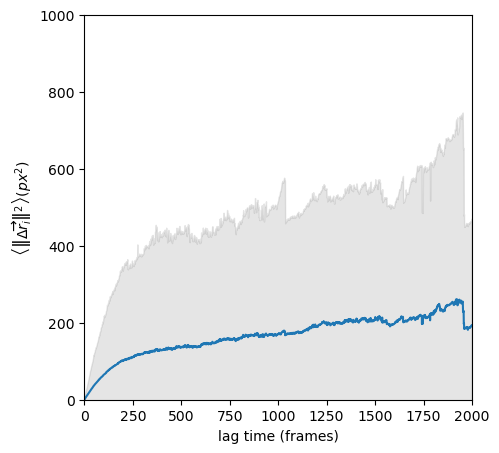

In [6]:
msd_df_ = msd_df
msd_df_["squared displacement from origin"] = msd_df_["displacement from origin"].apply(lambda x: x*x)
msd = msd_df_.groupby("dt acc")["squared displacement from origin"].mean()
msd_sd = msd_df_.groupby("dt acc")["squared displacement from origin"].std()
#single_tcell_df = msd_df_.loc[msd_df_["track_id"]==TRACK_ID_TCELL]

print(msd, msd_sd)
# track_id = 100

fig, axs = plt.subplots(1,1,figsize=(5,5))
msd.plot(
    ax=axs,
    xlabel="lag time (frames)",
    ylabel=r'$\left\langle \left\| \Delta \overrightarrow{r}_i \right\|^2 \right\rangle (px^2)$'
    )
axs.fill_between(np.arange(len(msd_sd)),msd-msd_sd,msd+msd_sd, color='gray', alpha=0.2, label='Std Dev')
axs.set_xlim([0,2000])
axs.set_ylim([0,1000])

#axs.set_yscale("log")
#axs.set_xscale("log")

### Calculate MSD for consecutive points in space 

In [7]:
msd_df_data = tracks_df_filtered_tcell[["label","x","y","track_id", "frame", "dx from previous point", "dy from previous point", "displacement from previous point"]]

msd_df_data = msd_df_data.sort_values(by=["track_id","frame"])
msd_results = pd.DataFrame(columns=["track_id", "dt", "msd"])

for t_id in tqdm(range(100,200)):
    #print(t_id)
    curr_track = msd_df_data.loc[msd_df_data["track_id"]==t_id]
    dt_array=[]
    if int(len(curr_track["frame"]))>0:
        #for dt in tqdm(np.logspace(0,100/int(len(curr_track["frame"])*0.7),num=30, base=10)):
        for dt in tqdm(range(1,int(len(curr_track["frame"])*0.7))):
            sd=[]
            dt=int(dt)
            #dt_array.append(dt)
            for t in range(len(curr_track["frame"])-int(dt)):
                #print(t, dt)
                try:
                    dx=(curr_track.loc[curr_track["frame"]==(t+dt),'x'].values[0]- curr_track.loc[curr_track["frame"]==t,'x'].values[0])**2
                    dy =(curr_track.loc[curr_track["frame"]==(t+dt),'y'].values[0]- curr_track.loc[curr_track["frame"]==t,'y'].values[0])**2
                    sd.append(dx + dy)
                    #
                except IndexError:
                    break

            msd_results.loc[len(msd_results)] = [t_id, dt, np.nanmean(sd)]
            #msd_results = pd.concat[t_id, dt, np.nanmean(sd)]
            # msd_results["msd"] = np.nanmean(sd)
            # msd_results["dt"] = dt
            # msd_results["track_id"] = t_id
    #msd_df_data["dt"] = dt_array


  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_3037212/1050574670.py:26: RuntimeWarning: Mean of empty slice
  msd_results.loc[len(msd_results)] = [t_id, dt, np.nanmean(sd)]
/tmp/ipykernel_3037212/1050574670.py:26: RuntimeWarning: Mean of empty slice
  msd_results.loc[len(msd_results)] = [t_id, dt, np.nanmean(sd)]
/tmp/ipykernel_3037212/1050574670.py:26: RuntimeWarning: Mean of empty slice
  msd_results.loc[len(msd_results)] = [t_id, dt, np.nanmean(sd)]
/tmp/ipykernel_3037212/1050574670.py:26: RuntimeWarning: Mean of empty slice
  msd_results.loc[len(msd_results)] = [t_id, dt, np.nanmean(sd)]
  1%|          | 1/100 [00:00<00:54,  1.81it/s]/tmp/ipykernel_3037212/1050574670.py:26: RuntimeWarning: Mean of empty slice
  msd_results.loc[len(msd_results)] = [t_id, dt, np.nanmean(sd)]
/tmp/ipykernel_3037212/1050574670.py:26: RuntimeWarning: Mean of empty slice
  msd_results.loc[len(msd_results)] = [t_id, dt, np.nanmean(sd)]
/tmp/ipykernel_3037212/1050574670.py:26: RuntimeWarning: Mean 

100%|██████████| 85/85 [00:00<00:00, 527.32it/s]

71


Text(0.5, 0, 'fraction')

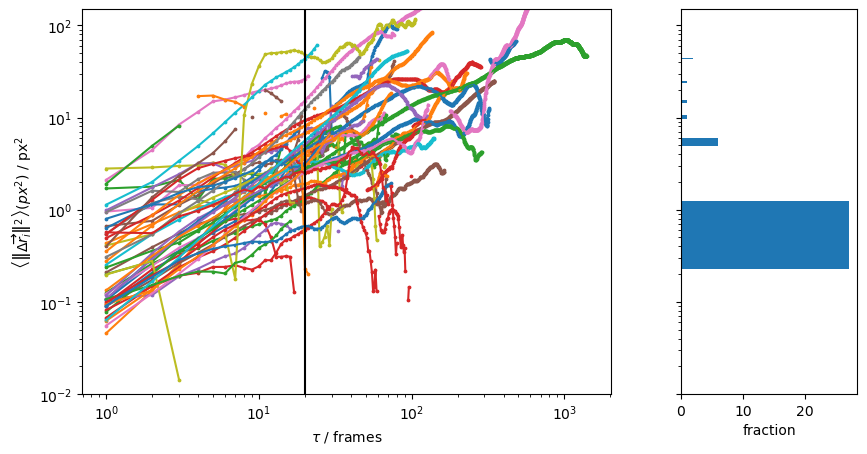

In [8]:
fig, axs = plt.subplots(1,2,figsize=(10,5),sharey=True,gridspec_kw={'width_ratios': [3, 1]})

msd_hist_values=[]

threshold=20

for track_id in tqdm(msd_results["track_id"].unique()):
    single_cell_df = msd_results.loc[msd_results["track_id"]==track_id]
    single_cell_df = single_cell_df.sort_values(by=["dt"])
    axs[0].scatter(single_cell_df['dt'], single_cell_df['msd'], label=track_id,s=3)
    axs[0].plot(single_cell_df['dt'], single_cell_df['msd'], label=track_id)
    axs[0].set_yscale("log")
    axs[0].set_xscale("log")
    if len(single_cell_df)>threshold:
        i=single_cell_df.loc[single_cell_df["dt"]==threshold,"msd"].values[0]
        msd_hist_values.append(i)
print(len(msd_hist_values))

msd_hist_values=[i for i in msd_hist_values if str(i) != 'nan']

axs[0].set_ylim(1e-2,1.5e2)
axs[0].vlines(threshold,1e-2,1.5e2,color='k')
H,B=np.histogram(msd_hist_values)
H_norm=H/len(msd_hist_values)
axs[1].barh(B[:-1],H,height=1,align='edge')
#axs[1].set_xlim(0,1)

axs[0].set_xlabel(r'$\tau$ / frames')
axs[0].set_ylabel(r'$\left\langle \left\| \Delta \overrightarrow{r}_i \right\|^2 \right\rangle (px^2)$ / px$^2$')
axs[1].set_xlabel(r'fraction')


### Displacement vs Travelled Distances

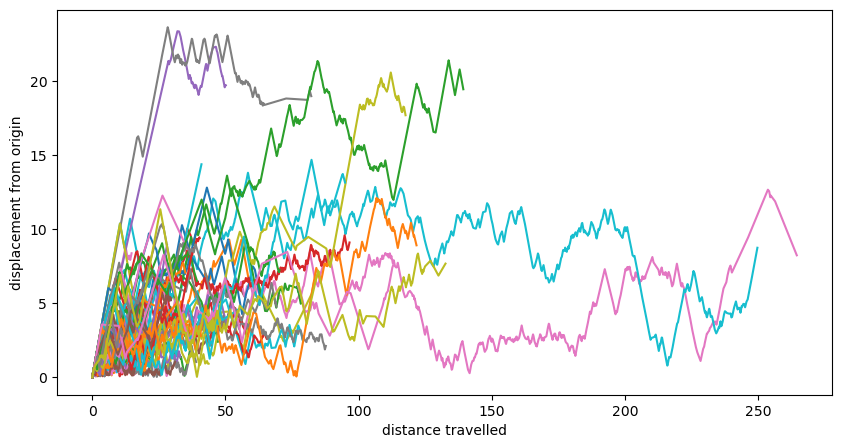

In [6]:
from tqdm import tqdm

fig, axs = plt.subplots(1,1,figsize=(10,5))
#axs.set_xlim(0,100)
#axs.set_ylim(0,100)

# isolate one cell
TRACK_ID_TCELL = 37

for t_id in range(400,500):

    single_tcell_df = tracks_df_filtered_tcell.loc[tracks_df_filtered_tcell["track_id"]==t_id]
    single_tcell_df = single_tcell_df.sort_values(by=["frame"])

    axs.plot(single_tcell_df["distance travelled"], single_tcell_df["displacement from origin"])
    axs.set_xlabel("distance travelled")
    axs.set_ylabel("displacement from origin")


# for t in tqdm(range(2000)):
#     single_tcell_df_ = single_tcell_df[single_tcell_df["frame"] == t]
#     single_tcell_df_.plot("distance travelled","displacement from origin",ax=axs,lw=0.2)

# axs.get_legend().remove()

### Speed 

In [10]:
tracks_df_filtered_tcell_ = tracks_df_filtered_tcell

tracks_df_filtered_tcell_

#tracks_df_filtered_tcell_["average speed"] = tracks_df_filtered_tcell_.groupby(["track_id"])["speed"].mean()
#tracks_df_filtered_tcell_

,label,y,x,bbox_xstart,bbox_ystart,bbox_xsize,bbox_ysize,i,j,bbox_istart,...,dy from origin,displacement from origin,dx acc,dy acc,distance travelled,vel_x,vel_y,speed,dt acc,average speed
0,9161,21.000000,1.181818,0,18,4,7,1.181818,21.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,NaN
1,420,46.549180,6.090164,0,40,14,13,6.090164,46.549180,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.185721
2,1935,61.300000,11.933333,8,57,9,9,11.933333,61.300000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.742700
3,700,57.642105,5.000000,0,53,13,11,5.000000,57.642105,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.761165
4,9496,95.000000,1.500000,0,93,4,5,1.500000,95.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.330685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907692,16874279,956.115385,884.653846,882,954,6,5,884.653846,956.115385,882.0,...,-0.625356,3.586283,6.289993,4.042151,8.451728,0.024217,-0.254986,0.256133,20,NaN
13907693,16868621,707.091398,905.274194,900,697,12,23,905.274194,707.091398,900.0,...,-5.184193,5.280024,9.190964,14.999987,18.678282,3.448107,-8.147733,8.847315,20,NaN
13907694,16870119,979.507463,966.477612,962,976,10,8,966.477612,979.507463,962.0,...,1.614606,8.533668,15.076362,8.864913,19.267006,-0.216833,0.285240,0.358299,20,NaN
13907695,16871255,665.020408,960.061224,956,661,9,8,960.061224,665.020408,956.0,...,-6.269066,9.731213,8.656212,7.234137,12.074976,0.561224,0.000408,0.561225,20,NaN


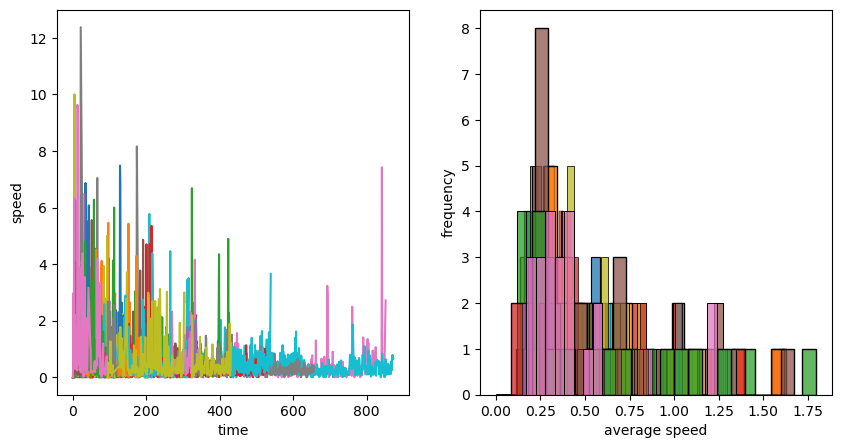

In [12]:
from tqdm import tqdm
import seaborn as sns

fig, axs = plt.subplots(1,2,figsize=(10,5))
#axs.set_xlim(0,100)
#axs.set_ylim(0,100)


#tracks_df_filtered_tcell["dy from origin"] = tracks_df_filtered_tcell.groupby(['track_id'])['dy from previous point'].cumsum().fillna(0)

# isolate one cell
TRACK_ID_TCELL = 37

for t_id in range(400,500):

    single_tcell_df = tracks_df_filtered_tcell_.loc[tracks_df_filtered_tcell_["track_id"]==t_id]
    single_tcell_df = single_tcell_df.sort_values(by=["frame"])

    axs[0].plot(single_tcell_df["frame"], single_tcell_df["speed"])
    axs[0].set_xlabel("time")
    axs[0].set_ylabel("speed")

    sns.histplot(data=single_tcell_df, x='average speed', bins=20, ax=axs[1])
    axs[1].set_xlabel("average speed")
    axs[1].set_ylabel("frequency")

In [22]:
single_tcell_df = tracks_df_filtered_tcell_.loc[tracks_df_filtered_tcell_["track_id"]==500]
single_tcell_df = single_tcell_df.sort_values(by=["frame"])
single_tcell_df["average speed"] = single_tcell_df["speed"].mean()
single_tcell_df[["tracked frames","tracked length","dt acc", "speed", "average speed"]]

,tracked frames,tracked length,dt acc,speed,average speed
2592830,19,30,0,0.000000,0.906021
2601049,19,30,1,0.259392,0.906021
2609248,19,30,2,0.515832,0.906021
2617471,19,30,3,0.178290,0.906021
2625685,19,30,4,3.123081,0.906021
2633908,19,30,5,0.351080,0.906021
2642120,19,30,6,0.351988,0.906021
2650326,19,30,7,0.311511,0.906021
2658508,19,30,8,0.148600,0.906021
2666672,19,30,9,0.249459,0.906021


In [45]:
single_tcell_df.columns

Index(['label', 'y', 'x', 'bbox_xstart', 'bbox_ystart', 'bbox_xsize',
       'bbox_ysize', 'i', 'j', 'bbox_istart', 'bbox_jstart', 'bbox_isize',
       'bbox_jsize', 'size', 'elongation', 'flatness', 'roundness',
       'feret_diameter', 'feret_radius', 'perimeter', 'mass', 'mean', 'median',
       'sd', 'frame', 'channel', 'alive', 'pi_mean', 'pi_median', 'pi_std',
       'corr_mean', 'corr_median', 'corr_std', 'track_id', 'id',
       'dist_from_ultrack', 'tracked frames', 'tracked length',
       'mean tracked cell size', 'dx from previous point',
       'dy from previous point', 'displacement from previous point',
       'dx from origin', 'dy from origin', 'displacement from origin',
       'dx acc', 'dy acc', 'distance travelled', 'vel_x', 'vel_y', 'speed',
       'dt acc', 'squared displacement from origin', 'average speed'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


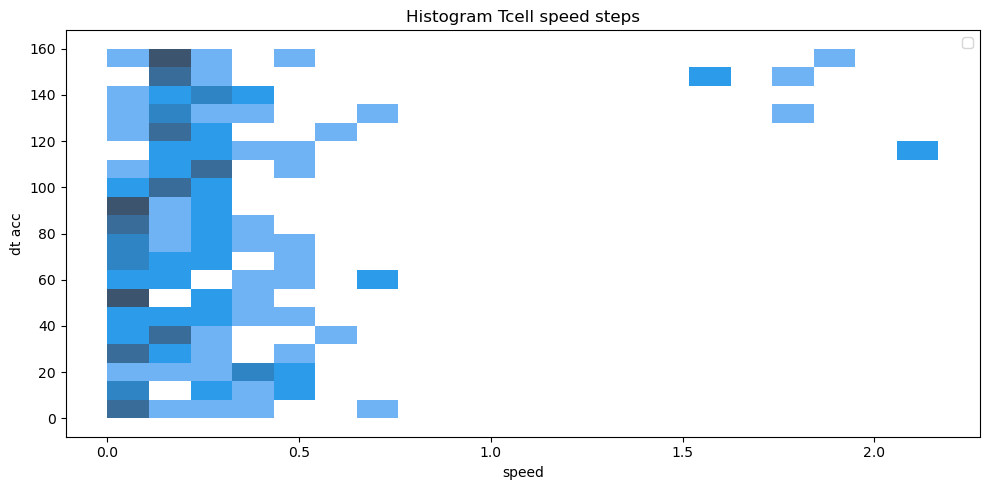

In [62]:
import seaborn as sns

single_tcell_df = tracks_df_filtered_tcell_.loc[tracks_df_filtered_tcell_["track_id"]==550]
single_tcell_df = single_tcell_df.sort_values(by=["frame"])

# Plot tcell histogram
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
#axes = axes.flatten()
sns.histplot(data=single_tcell_df, x='speed', y="dt acc",bins=20)
axes.set_title('Histogram Tcell speed steps for a single cell')
axes.set_xlabel("speed")
axes.set_ylabel("dt acc")
#axes[0].set_yscale("log")
axes.legend()
plt.tight_layout()


### Displacement and distance travelled ensemble histograms for T cells and Cancer Cells

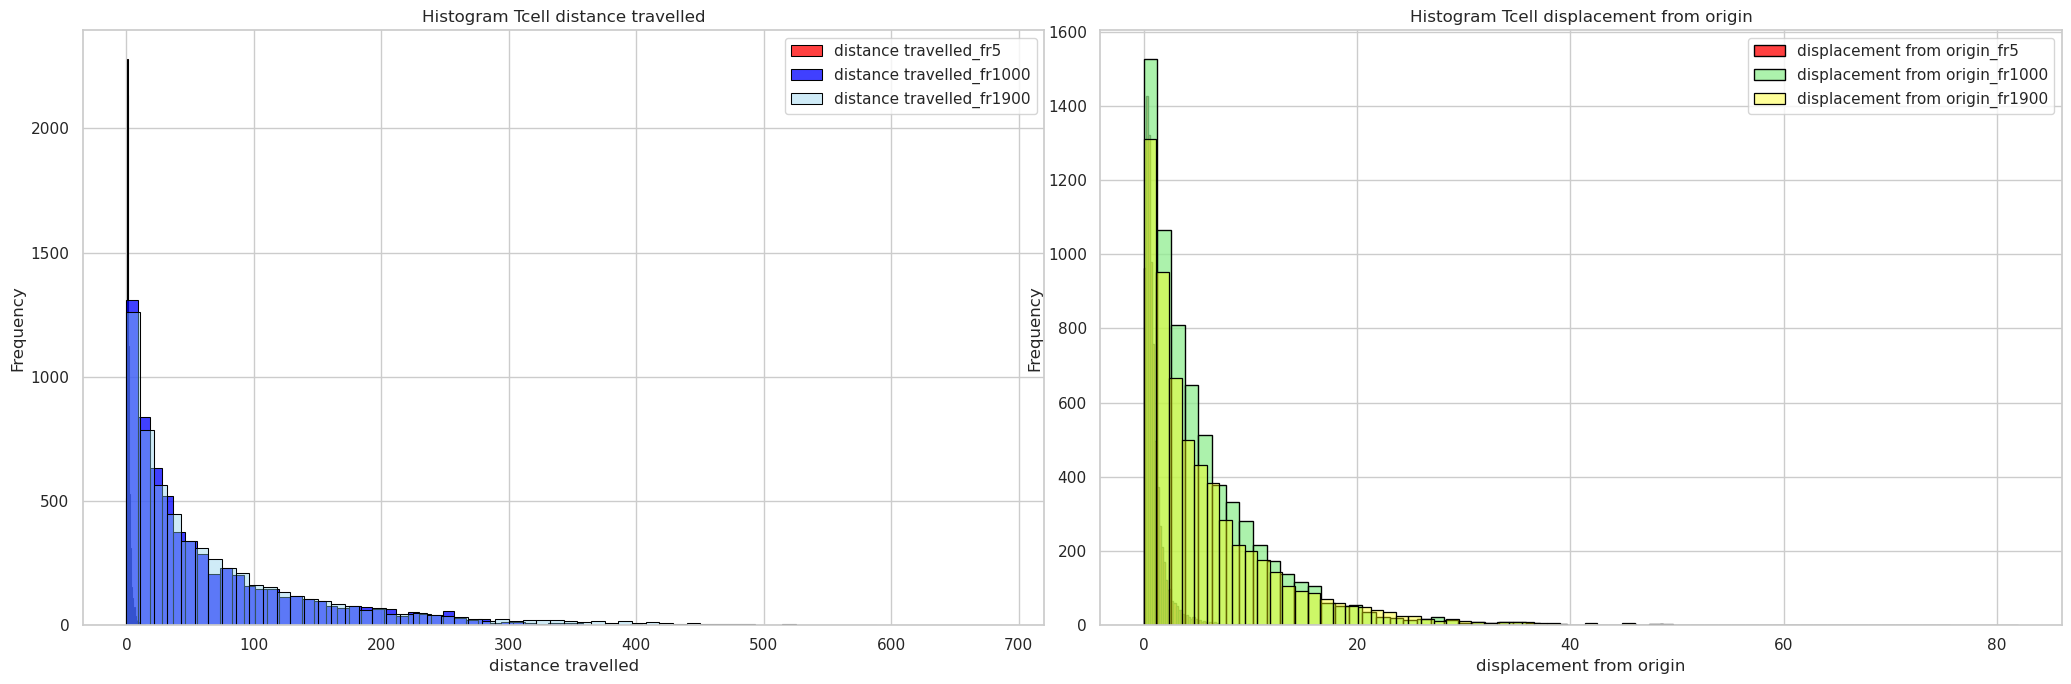

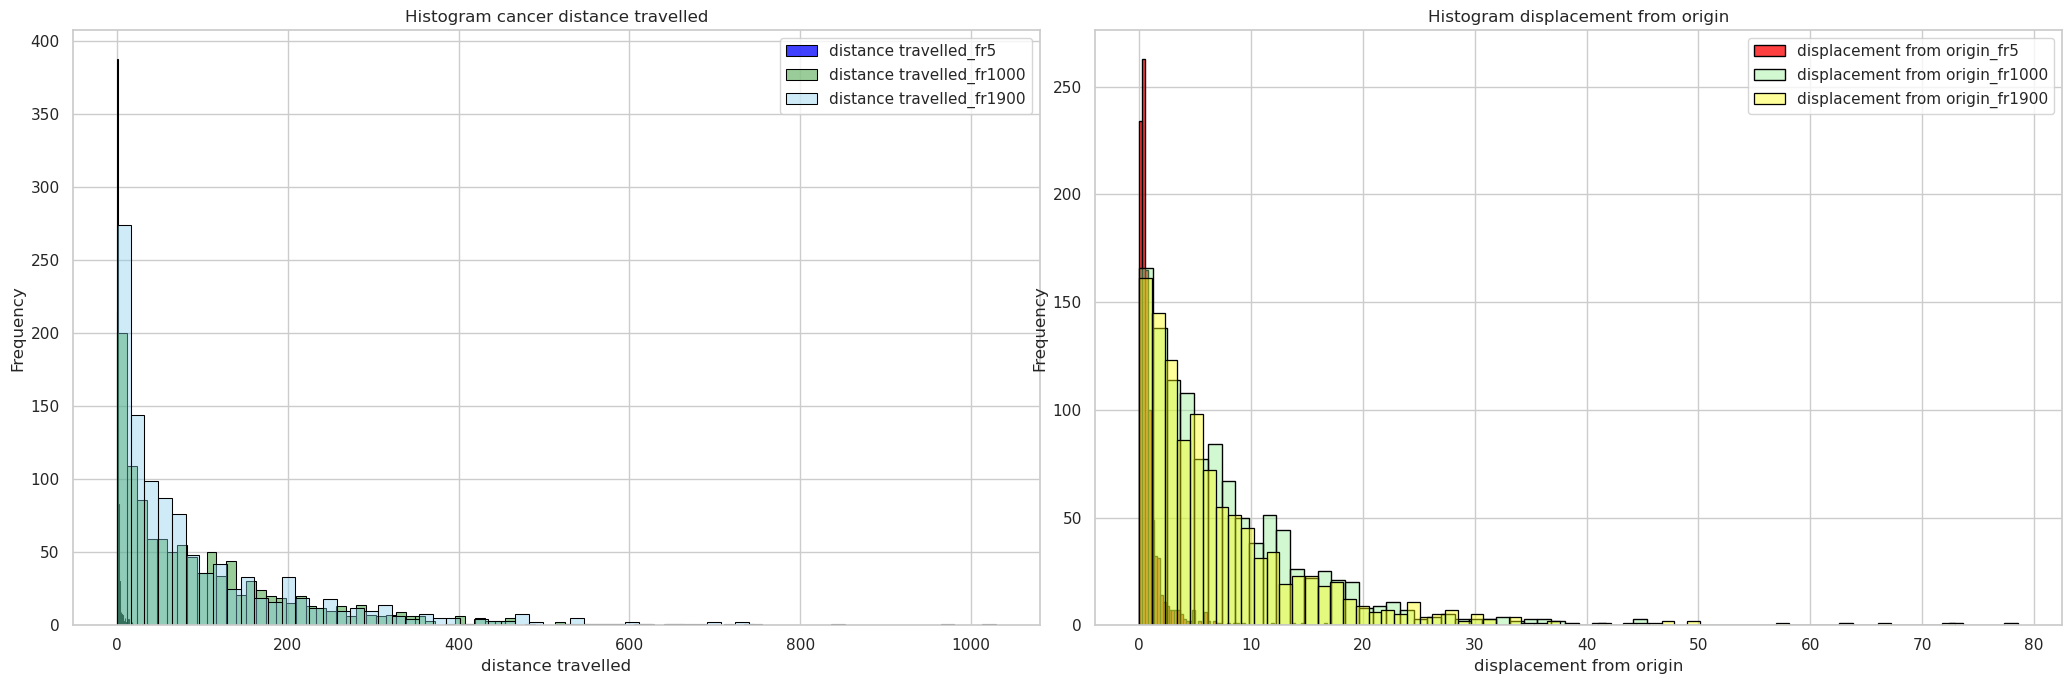

In [ ]:
import seaborn as sns

#axs.set_xlim(0,3)
#axs.set_ylim(0,125)
# Set Seaborn style
sns.set(style='whitegrid')

tracks_df_filtered_tcell_bright_5 = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==5]
tracks_df_filtered_tcell_bright_1000 = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==1000]
tracks_df_filtered_tcell_bright_1500 = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==1900]

tracks_df_filtered_tcell_corr_5 = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==5]
tracks_df_filtered_tcell_corr_1000 = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==1000]
tracks_df_filtered_tcell_corr_1500 = tracks_df_filtered_tcell[tracks_df_filtered_tcell["frame"]==1900]


tracks_df_filtered_cancer_bright_5 = tracks_df_filtered_cancer[tracks_df_filtered_cancer["frame"]==5]
tracks_df_filtered_cancer_bright_1000 = tracks_df_filtered_cancer[tracks_df_filtered_cancer["frame"]==1000]
tracks_df_filtered_cancer_bright_1500 = tracks_df_filtered_cancer[tracks_df_filtered_cancer["frame"]==1900]

tracks_df_filtered_cancer_corr_5 = tracks_df_filtered_cancer[tracks_df_filtered_cancer["frame"]==5]
tracks_df_filtered_cancer_corr_1000 = tracks_df_filtered_cancer[tracks_df_filtered_cancer["frame"]==1000]
tracks_df_filtered_cancer_corr_1500 = tracks_df_filtered_cancer[tracks_df_filtered_cancer["frame"]==1900]



# Plot tcell histogram
fig, axes = plt.subplots(1, 2, figsize=(21, 7))
axes = axes.flatten()
sns.histplot(data=tracks_df_filtered_tcell_bright_5, x='distance travelled', bins=64, kde=False, color='red', edgecolor='black',ax=axes[0], label='distance travelled_fr5')
sns.histplot(data=tracks_df_filtered_tcell_bright_1000, x='distance travelled', bins=64, kde=False, color='blue', edgecolor='black',ax=axes[0], label='distance travelled_fr1000')
sns.histplot(data=tracks_df_filtered_tcell_bright_1500, x='distance travelled', bins=64, kde=False, color='skyblue', edgecolor='black', label='distance travelled_fr1900',ax=axes[0],alpha=0.4)
axes[0].set_title('Histogram Tcell distance travelled')
axes[0].set_xlabel("distance travelled")
axes[0].set_ylabel("Frequency")
#axes[0].set_yscale("log")
axes[0].legend()
plt.tight_layout()

# Plot a histogram
sns.histplot(data=tracks_df_filtered_tcell_bright_5, x='displacement from origin', bins=64, kde=False, color='red', edgecolor='black', ax=axes[1],label='displacement from origin_fr5')
sns.histplot(data=tracks_df_filtered_tcell_bright_1000, x='displacement from origin', bins=64, kde=False, color='lightgreen', edgecolor='black', ax=axes[1],label='displacement from origin_fr1000')
sns.histplot(data=tracks_df_filtered_tcell_bright_1500, x='displacement from origin', bins=64, kde=False, color="yellow", edgecolor='black', ax=axes[1], label='displacement from origin_fr1900', alpha=0.4)
axes[1].set_title('Histogram Tcell displacement from origin')
axes[1].set_xlabel("displacement from origin")
axes[1].set_ylabel("Frequency")
#axes[1].set_yscale("log")
axes[1].legend()

# # Plot a histogram
# sns.histplot(data=tracks_df_filtered_tcell_corr_5, x='corr_mean', bins=64, kde=False, color='red', edgecolor='black', ax=axes[2],label='corr_mean_fr5')
# sns.histplot(data=tracks_df_filtered_tcell_corr_1000, x='corr_mean', bins=64, kde=False, color='lightgreen', edgecolor='black', ax=axes[2],label='corr_mean_fr1000')
# sns.histplot(data=tracks_df_filtered_tcell_corr_1500, x='corr_mean', bins=64, kde=False, color="yellow", edgecolor='black', ax=axes[2], label='corr_mean_fr1900', alpha=0.4)
# axes[2].set_title('Histogram Tcell corr')
# axes[2].set_xlabel("Mean Corr brightness")
# axes[2].set_ylabel("Frequency")
# axes[2].set_yscale("log")
# axes[2].set_xlim([32000,44000])
# axes[2].legend()

# plt.tight_layout()


#### Plot cancer histogram
fig, axes = plt.subplots(1, 2, figsize=(21, 7))
axes = axes.flatten()
sns.histplot(data=tracks_df_filtered_cancer_bright_5, x='distance travelled', bins=64, kde=False, color='blue', edgecolor='black', label='distance travelled_fr5', ax=axes[0])
sns.histplot(data=tracks_df_filtered_cancer_bright_1000, x='distance travelled', bins=64, kde=False, color='green', edgecolor='black', label='distance travelled_fr1000',alpha=0.4, ax=axes[0])
sns.histplot(data=tracks_df_filtered_cancer_bright_1500, x='distance travelled', bins=64, kde=False, color='skyblue', edgecolor='black', label='distance travelled_fr1900', alpha=0.4,ax=axes[0])
axes[0].set_title('Histogram cancer distance travelled')
axes[0].set_xlabel("distance travelled")
axes[0].set_ylabel("Frequency")
#axes[0].set_yscale("log")
axes[0].legend()
plt.tight_layout()

# Plot a histogram
sns.histplot(data=tracks_df_filtered_cancer_bright_5, x='displacement from origin', bins=64, kde=False, color='red', edgecolor='black', label='displacement from origin_fr5', ax=axes[1])
sns.histplot(data=tracks_df_filtered_cancer_bright_1000, x='displacement from origin', bins=64, kde=False, color='lightgreen', edgecolor='black', label='displacement from origin_fr1000',alpha=0.4, ax=axes[1])
sns.histplot(data=tracks_df_filtered_cancer_bright_1500, x='displacement from origin', bins=64, kde=False, color='yellow', edgecolor='black', label='displacement from origin_fr1900', alpha=0.4,ax=axes[1])
axes[1].set_title('Histogram displacement from origin')
axes[1].set_xlabel("displacement from origin")
axes[1].set_ylabel("Frequency")
#axes[1].set_yscale("log")
axes[1].legend()

# # Plot a histogram
# sns.histplot(data=tracks_df_filtered_cancer_corr_5, x='corr_mean', bins=64, kde=False, color='red', edgecolor='black', ax=axes[2],label='corr_mean_fr5')
# sns.histplot(data=tracks_df_filtered_cancer_corr_1000, x='corr_mean', bins=64, kde=False, color='lightgreen', edgecolor='black', ax=axes[2],label='corr_mean_fr1000')
# sns.histplot(data=tracks_df_filtered_cancer_corr_1500, x='corr_mean', bins=64, kde=False, color="yellow", edgecolor='black', ax=axes[2], label='corr_mean_fr1900', alpha=0.4)
# axes[2].set_title('Histogram Tcell corr')
# axes[2].set_xlabel("Mean Corr brightness")
# axes[2].set_ylabel("Frequency")
# axes[2].set_yscale("log")
# axes[2].set_xlim([32000,44000])
# axes[2].legend()



# plt.tight_layout()


Plot tracks in space centered at their initial position 

In [ ]:
def plot_tracks(tracks_df: pd.DataFrame) -> None:
    """Center tracks at their initial position and plot them.

    Parameters
    ----------
    tracks_df : pd.DataFrame
        Tracks datafarame sorted by `track_id` and `t`.

    Returns
    -------
    pd.DataFrame
        Centered dataframe.
    """
    centered_df = tracks_df.copy()
    centered_df[["y", "x"]] = centered_df.groupby(
        "track_id",
        as_index=False,
    )[["y", "x"]].transform(lambda x: x - x.iloc[0])

    # sanity check
    assert (centered_df[centered_df["frame"] == 0][["y", "x"]] == 0).all().all()

    pallete = sns.color_palette(["gray"], len(centered_df["track_id"].unique()))
    sns.lineplot(
        data=centered_df,
        x="x",
        y="y",
        hue="track_id",
        palette=pallete,
        legend=False,
        alpha=0.5,
        sort=False,
        estimator=None,
    )

    return centered_df

In [ ]:
import seaborn as sns
plot_tracks(msd_df)

Plot tracks in space

In [ ]:
track_id = 10

fig, axs = plt.subplots(1,1,figsize=(10,5))

for t_id in tqdm(range(2000)):
    single_cell_df = msd_df.loc[msd_df["track_id"]==t_id]
    single_cell_df = single_cell_df.sort_values(by=["frame"])
    axs.plot(single_cell_df['x'], single_cell_df['y'], label=track_id)